# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [5]:
df.count(axis = 0)

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations

> ### Question 2.  Create a summary table.

In [12]:

df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [14]:
df['gre'].order().values

/Users/MacKenzie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


array([ 220.,  300.,  300.,  300.,  340.,  340.,  340.,  340.,  360.,
        360.,  360.,  360.,  380.,  380.,  380.,  380.,  380.,  380.,
        380.,  380.,  400.,  400.,  400.,  400.,  400.,  400.,  400.,
        400.,  400.,  400.,  400.,  420.,  420.,  420.,  420.,  420.,
        420.,  420.,  440.,  440.,  440.,  440.,  440.,  440.,  440.,
        440.,  440.,  440.,  460.,  460.,  460.,  460.,  460.,  460.,
        460.,  460.,  460.,  460.,  460.,  460.,  460.,  480.,  480.,
        480.,  480.,  480.,  480.,  480.,  480.,  480.,  480.,  480.,
        480.,  480.,  480.,  480.,  480.,  500.,  500.,  500.,  500.,
        500.,  500.,  500.,  500.,  500.,  500.,  500.,  500.,  500.,
        500.,  500.,  500.,  500.,  500.,  500.,  500.,  500.,  520.,
        520.,  520.,  520.,  520.,  520.,  520.,  520.,  520.,  520.,
        520.,  520.,  520.,  520.,  520.,  520.,  520.,  520.,  520.,
        520.,  520.,  520.,  520.,  520.,  540.,  540.,  540.,  540.,
        540.,  540.,

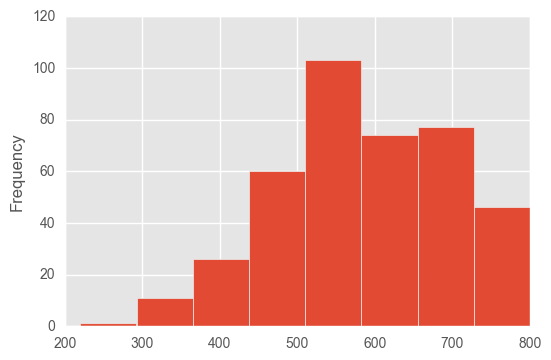

In [15]:
df['gre'].plot(kind='hist', bins=8)

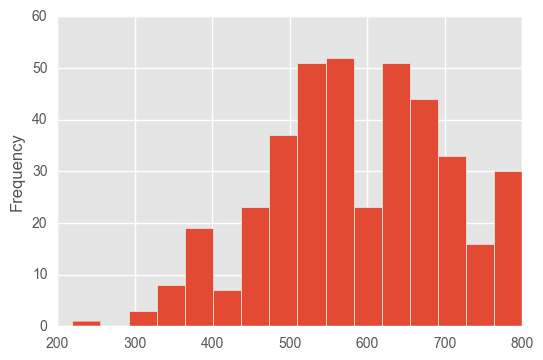

In [16]:
df['gre'].plot(kind='hist', bins=16)

In [17]:
df['gpa'].order().values

/Users/MacKenzie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


array([ 2.26,  2.42,  2.42,  2.48,  2.52,  2.55,  2.56,  2.62,  2.62,
        2.63,  2.65,  2.67,  2.67,  2.68,  2.69,  2.7 ,  2.7 ,  2.71,
        2.71,  2.73,  2.76,  2.78,  2.78,  2.79,  2.79,  2.81,  2.81,
        2.81,  2.82,  2.82,  2.83,  2.84,  2.85,  2.85,  2.86,  2.86,
        2.87,  2.88,  2.9 ,  2.9 ,  2.9 ,  2.9 ,  2.91,  2.91,  2.91,
        2.92,  2.92,  2.93,  2.93,  2.93,  2.93,  2.93,  2.94,  2.94,
        2.94,  2.95,  2.96,  2.96,  2.97,  2.97,  2.98,  2.98,  2.98,
        2.98,  2.98,  2.98,  3.  ,  3.  ,  3.  ,  3.  ,  3.01,  3.01,
        3.02,  3.02,  3.02,  3.02,  3.03,  3.04,  3.04,  3.05,  3.05,
        3.05,  3.06,  3.07,  3.07,  3.07,  3.07,  3.08,  3.08,  3.08,
        3.08,  3.09,  3.1 ,  3.11,  3.12,  3.12,  3.12,  3.12,  3.13,
        3.13,  3.13,  3.13,  3.13,  3.14,  3.14,  3.14,  3.14,  3.15,
        3.15,  3.15,  3.15,  3.15,  3.15,  3.15,  3.16,  3.16,  3.17,
        3.17,  3.17,  3.17,  3.17,  3.18,  3.19,  3.19,  3.19,  3.19,
        3.19,  3.2 ,

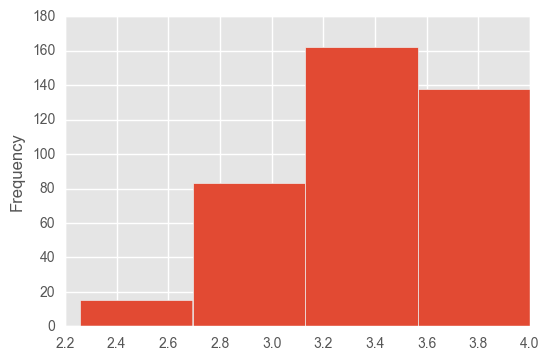

In [18]:
df['gpa'].plot(kind='hist', bins=4)

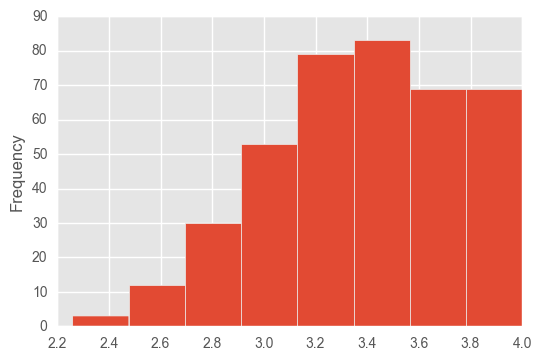

In [19]:
df['gpa'].plot(kind='hist', bins=8)

Answer: The distribution of the GRE data is much more uneven thatn the distribution of the GPA data

> ### Question 4.  Drop data points with missing data.

In [20]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [23]:
df = df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [24]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer:

> ### Question 6.  Create boxplots for `gre` and `gpa`.

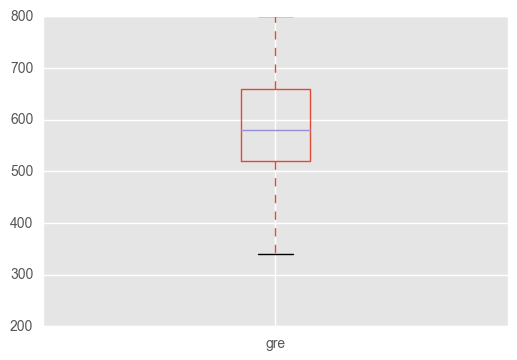

In [30]:
df['gre'].plot(kind='box')

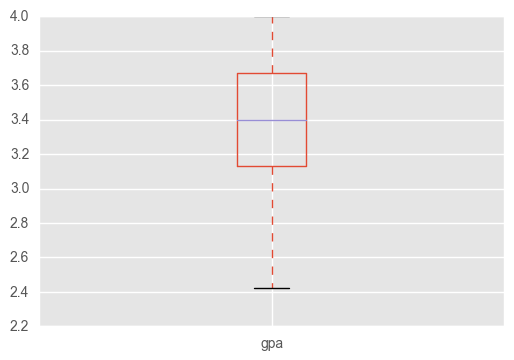

In [31]:
df['gpa'].plot(kind='box')

> ### Question 7.  What do boxplots show?

Answer:

> ### Question 8.  Plot the distribution of each variable.

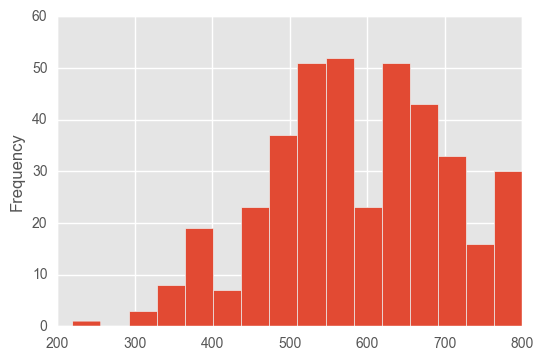

In [34]:
df['gre'].sort_values()
df['gre'].plot(kind='hist', bins=16)

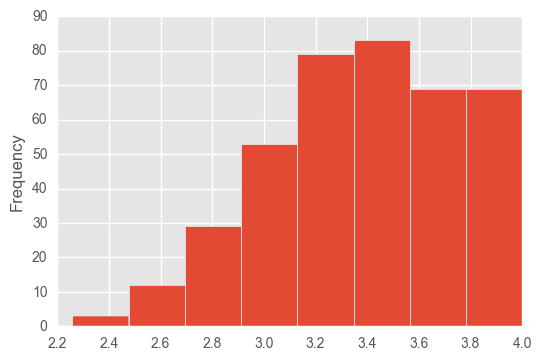

In [35]:
df['gpa'].sort_values()
df['gpa'].plot(kind='hist', bins=8)

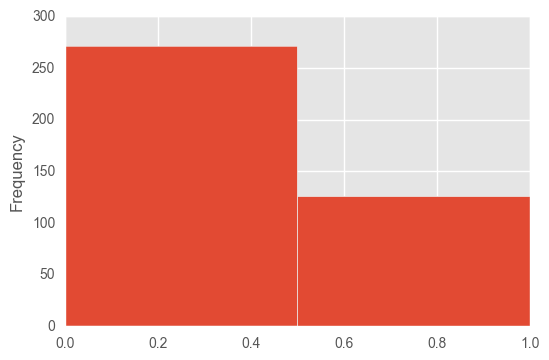

In [36]:
df['admit'].sort_values()
df['admit'].plot(kind='hist', bins=2)

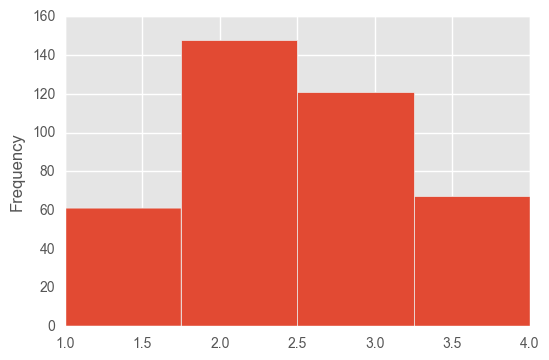

In [37]:
df['prestige'].sort_values()
df['prestige'].plot(kind='hist', bins=4)

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [ ]:
# TODO

In [ ]:
# TODO

Answer:

> ### Question 10.  Create a correlation matrix for the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf7a790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d06e710>]], dtype=object)

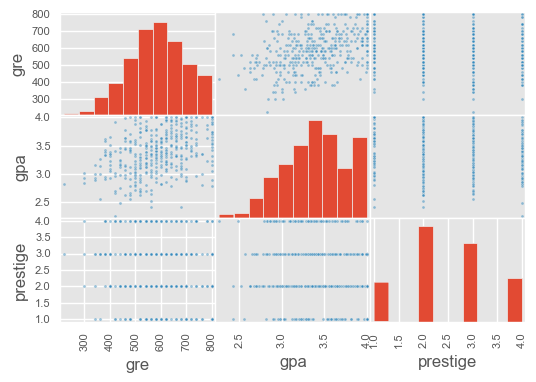

In [41]:
pd.scatter_matrix(df[['gre', 'gpa', 'prestige']])

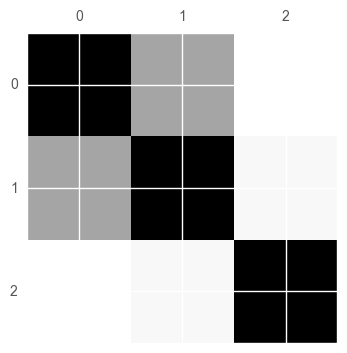

In [44]:
plt.matshow(df[['gre', 'gpa', 'prestige']].corr())

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer:

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:

> ### Question 13.  What is your hypothesis?

Answer: